<a href="https://colab.research.google.com/github/alfie-agustin/Analisis-predictivo/blob/main/Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

import random
random.seed(8)

Importamos base datos

In [9]:
boston = datasets.load_boston()
boston


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [11]:
print("Info del dataset: ")
print(boston.DESCR)

Info del dataset: 
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
  

In [16]:
print("Cantiad de datos: ")
print(boston.data.shape)

Cantiad de datos: 
(506, 13)


In [18]:
print("Numero de columnas: ")
print(boston.feature_names)

Numero de columnas: 
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


#REGRESION LINEAL SIMPLE

<function matplotlib.pyplot.show(*args, **kw)>

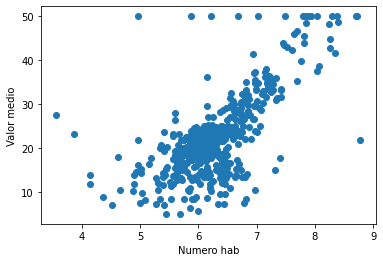

In [20]:
x = boston.data[: np.newaxis, 5]
y = boston.target

plt.scatter(x, y)
plt.xlabel("Numero hab")
plt.ylabel("Valor medio")
plt.show

Datos del modelo lineal simple 
Valor de la pendiente o del coef 'a':  [9.10210898]
Valor de la interseccion o del coef 'b': -34.67062077643857
La ecuacion del modelo =  [9.10210898] X -34.67062077643857
Presicion del modelo:  0.48352545599133423


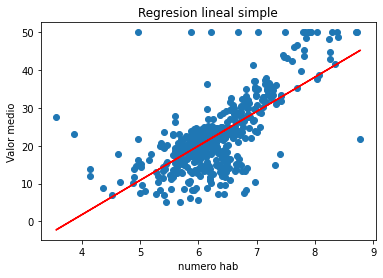

In [38]:
lr = linear_model.LinearRegression()
x = x.reshape(-1, 1)
lr.fit(x, y)
ypred = lr.predict(x)


plt.scatter(x, y)
plt.plot(x, ypred, color = 'red')
plt.title('Regresion lineal simple')
plt.xlabel("numero hab")
plt.ylabel("Valor medio")
plt.show

print("Datos del modelo lineal simple ")

print("Valor de la pendiente o del coef 'a': ", lr.coef_)

print("Valor de la interseccion o del coef 'b':", lr.intercept_)

print("La ecuacion del modelo = ", lr.coef_,"X",lr.intercept_)

print("Presicion del modelo: ", lr.score(x, y))


#Implementacion con split de datos

In [39]:
from sklearn.model_selection import train_test_split

#separo train y test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20 )

print(x_train.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

#defino algoritmo a utilizar

lr = linear_model.LinearRegression()
x_train = x_train.reshape(-1, 1)
lr.fit(x_train, y_train)
ypred_ = lr.predict(x_test)


(404, 1)
(404,)
(102, 1)
(102,)


Datos del modelo lineal simple 
Valor de la pendiente o del coef 'a':  [9.76287507]
Valor de la interseccion o del coef 'b': -38.953565305167515
La ecuacion del modelo =  [9.76287507] X -38.953565305167515
Presicion del modelo:  0.48077624515055195


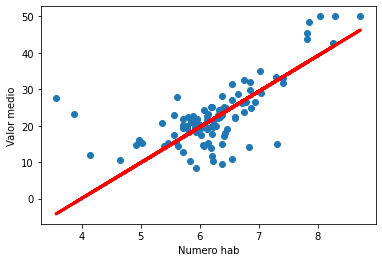

In [46]:
plt.scatter(x_test, y_test)
plt.plot(x_test, ypred_, color = 'red', linewidth = 3)
plt.xlabel("Numero hab")
plt.ylabel("Valor medio")
plt.show


print("Datos del modelo lineal simple ")

print("Valor de la pendiente o del coef 'a': ", lr.coef_)

print("Valor de la interseccion o del coef 'b':", lr.intercept_)

print("La ecuacion del modelo = ", lr.coef_,"X",lr.intercept_)

print("Presicion del modelo: ", lr.score(x, y))

In [49]:
print("El score de testeo es: ", lr.score(x_test, y_test))

El score de testeo es:  0.41787269726065024


#Regresion lineal multiple 


In [65]:
from sklearn.model_selection import train_test_split


x_multiple = boston.data[:,5:8]
y_multiple = boston.target

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_multiple,y_multiple, test_size=0.20 )

print(x_train1.shape), print(y_train1.shape)
print(x_test1.shape), print(y_test1.shape)

(404, 3)
(404,)
(102, 3)
(102,)


(None, None)

In [66]:
from sklearn import linear_model

regresion = linear_model.LinearRegression()

regresion.fit(x_train1, y_train1)

pred = regresion.predict(x_test1)


In [67]:
print("Datos del modelo lineal simple ")

print("Valor de la pendiente o del coef 'a': ", regresion.coef_)

print("Valor de la interseccion o del coef 'b':", regresion.intercept_)

print("La ecuacion del modelo = ", regresion.coef_[0],"X +", regresion.coef_[1],"X +", regresion.coef_[2],"X +",regresion.intercept_)

print("Presicion del modelo: ", regresion.score(x_train1, y_train1))

print("El score es: ", regresion.score(x_test1, y_test1))

Datos del modelo lineal simple 
Valor de la pendiente o del coef 'a':  [ 8.59222608 -0.09986598 -0.46275148]
Valor de la interseccion o del coef 'b': -22.914312140877037
La ecuacion del modelo =  8.59222607522297 X + -0.09986597794401997 X + -0.4627514768397417 X + -22.914312140877037
Presicion del modelo:  0.53341544674764
El score es:  0.5422107997685915
